In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("Datasets/train.csv")

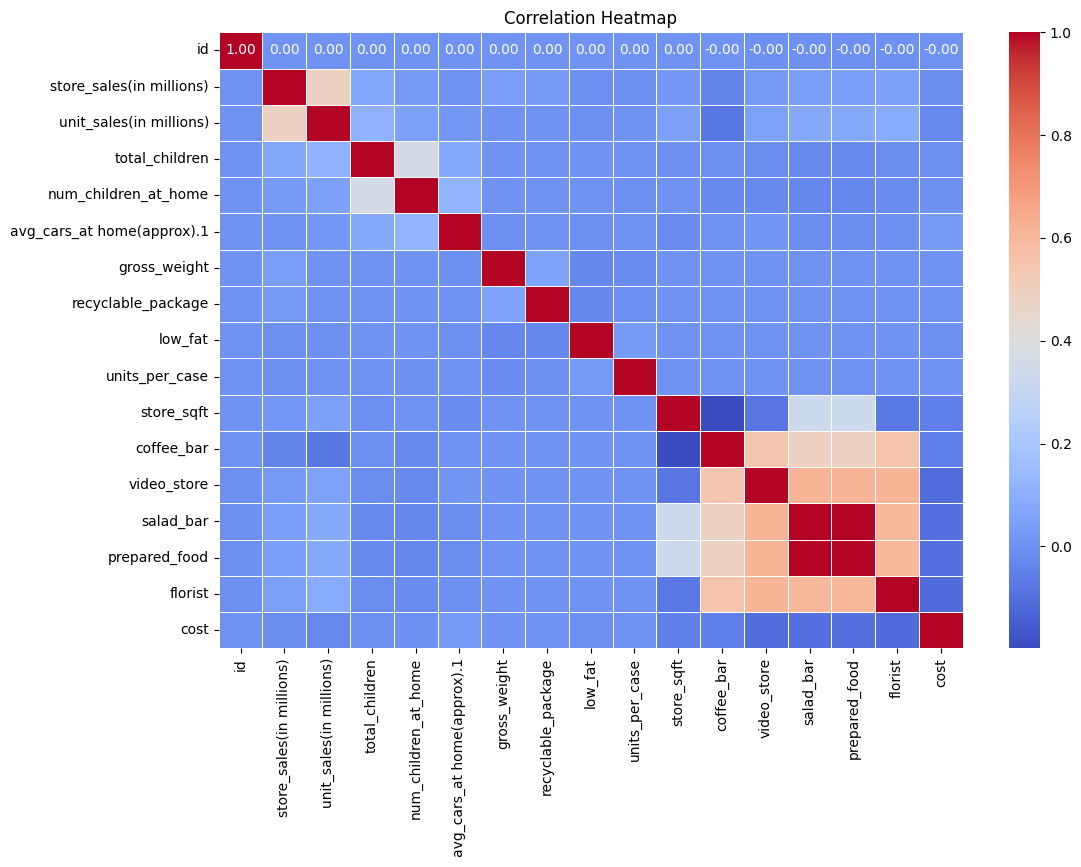

In [3]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
threshold = 0.8
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

In [5]:
feature_pairs_to_remove = []
for feature1 in train_df.columns:
    for feature2 in train_df.columns:
        if highly_correlated[feature1][feature2]:
            feature_pairs_to_remove.append((feature1, feature2))

In [6]:
features_to_remove = set()
for feature1, feature2 in feature_pairs_to_remove:
    if feature1 not in features_to_remove:
        features_to_remove.add(feature2)

train_df.drop(columns=features_to_remove, inplace=True)

In [7]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(train_df.drop(['id','cost'], axis = 1)))
y_train = train_df['cost']

In [8]:
train_df.shape, x_train.shape, y_train.shape

((360336, 16), (360336, 14), (360336,))

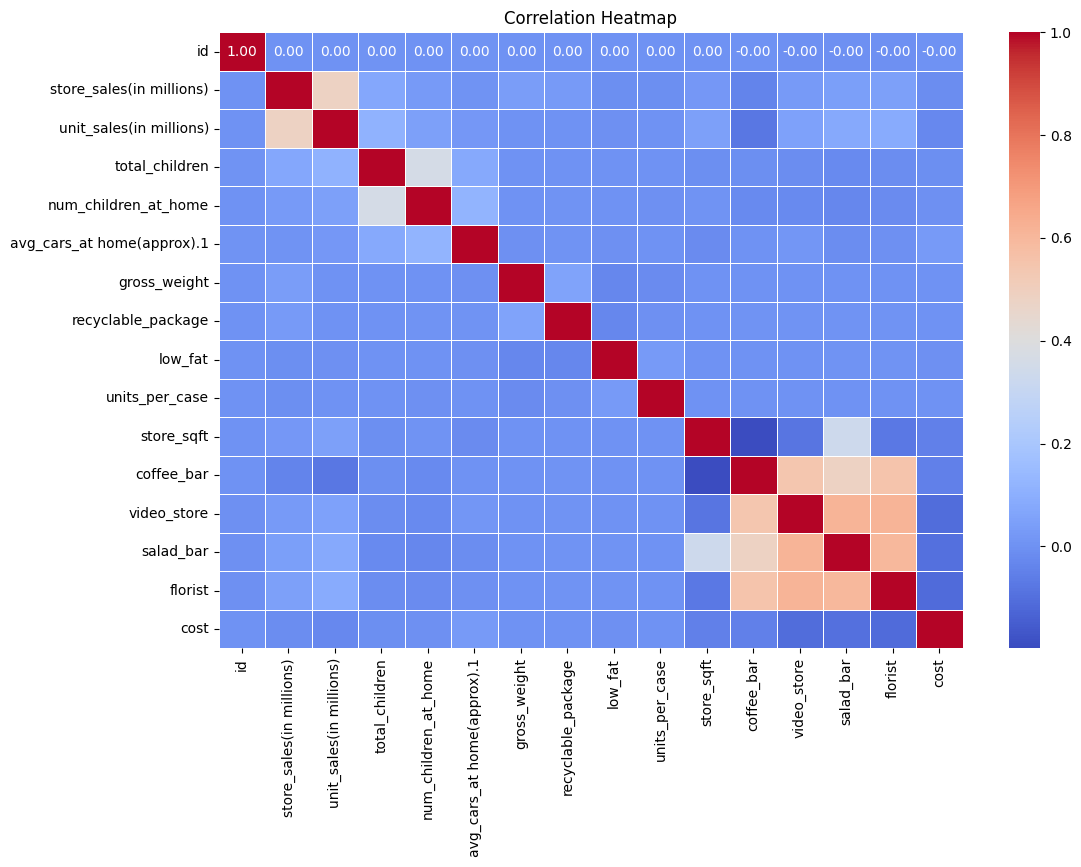

In [9]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()